In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load datasets (Replace with your file paths)
df_movie = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df_rating = pd.read_csv('ratings.dat', sep='::', engine='python', encoding='utf-8')
df_user = pd.read_csv('users.dat', sep='::', engine='python', encoding='utf-8')


In [47]:
# Rename columns for consistency
df_movie.columns = ['MovieID', 'MovieName', 'Genres']
df_rating.columns = ['UserID', 'MovieID', 'Rating', 'TimeStamp']
df_user.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

# Merge datasets
df = pd.merge(df_movie, df_rating, on='MovieID', how='inner')
df = pd.merge(df, df_user, on='UserID', how='inner')

# Feature Engineering
df['ReleaseYear'] = df['MovieName'].str.extract(r'\((\d{4})\)')
df['ReleaseYear'] = pd.to_numeric(df['ReleaseYear'], errors='coerce')

# One-hot encoding for movie genres
genre_columns = df['Genres'].str.get_dummies('|')
df = pd.concat([df, genre_columns], axis=1)


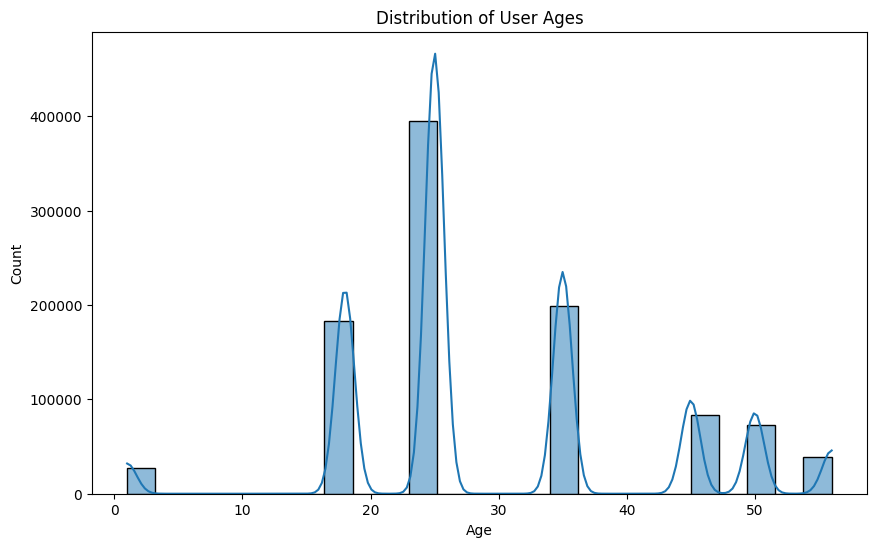

In [48]:
# Visualize user age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


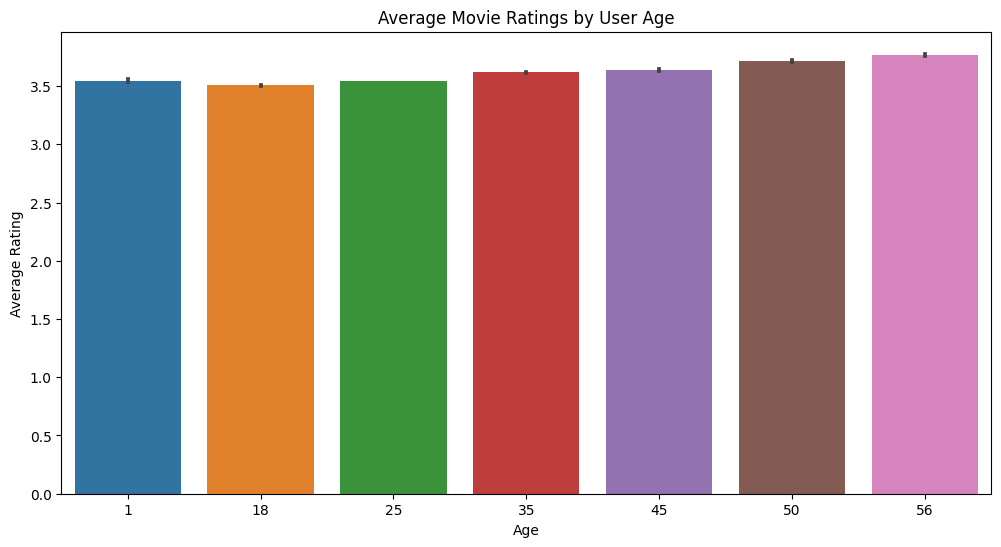

In [49]:
# Visualize average movie ratings based on user age
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Age', y='Rating')
plt.title('Average Movie Ratings by User Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.show()


<ipython-input-50-fafc4e96bf64>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='ReleaseYear', y='Rating', ci=None)


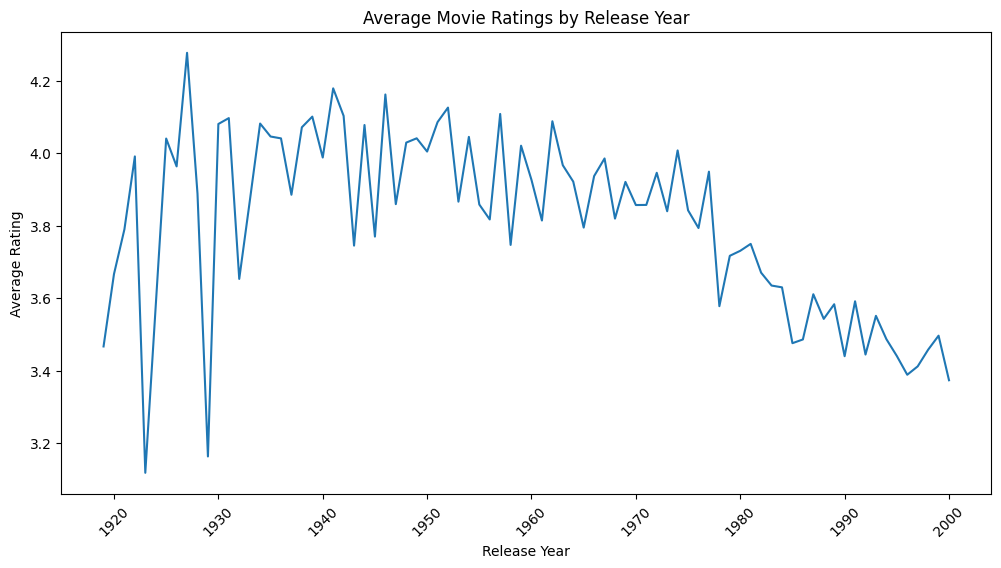

In [50]:
# Visualize average movie ratings based on movie release year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ReleaseYear', y='Rating', ci=None)
plt.title('Average Movie Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [57]:
# Prepare data for training
features = df[['Age', 'Occupation'] + list(genre_columns.columns)].values
labels = df['Rating'].values

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)



In [58]:
# Initialize and train regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor()
]

for model in models:
    model.fit(train_features, train_labels)
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = np.sqrt(mse)
    print(f'{type(model).__name__} - MAE: {mae:.4f}, RMSE: {rmse:.4f}')


LinearRegression - MAE: 0.9022, RMSE: 1.0971
Ridge - MAE: 0.9022, RMSE: 1.0971
Lasso - MAE: 0.9352, RMSE: 1.1186
ElasticNet - MAE: 0.9343, RMSE: 1.1176
DecisionTreeRegressor - MAE: 0.8776, RMSE: 1.0855
RandomForestRegressor - MAE: 0.8753, RMSE: 1.0803
GradientBoostingRegressor - MAE: 0.8937, RMSE: 1.0871
